# Machine Learning Model for Laptop Price Prediction
---

## Import Independencies or Libraries

In [1]:
import pandas as pd  # Import pandas library for file handling
import numpy as np   # Import numpy library for numerical computations
import matplotlib.pyplot as plt  # Import matplotlib for visualization
import seaborn as sns # For visulization
import re  # Regular expression for feature engineering

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


## Dataset Overview

In [2]:
#Load the laptop.csv file and create a dataframe
df= pd.read_csv('laptop_data.csv')

In [3]:
#Display the dataset
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
# Display random values to find any abnormalities in the data

df.sample(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
196,196,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,324954.7200
394,394,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon R7 M445,Linux,2.33kg,41498.1936
306,306,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.28kg,105228.0000
235,235,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,256GB SSD,AMD Radeon R7 M445,Linux,2.36kg,47898.7200
1254,1254,Dell,Notebook,15.6,1366x768,Intel Pentium Quad Core N3700 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,23655.7872
286,286,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 630,Windows 10,1.95kg,58448.1600
527,527,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,8GB,2TB HDD,Nvidia GeForce 920MX,No OS,2.2kg,24455.5200
42,42,Asus,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Nvidia GeForce 940MX,Linux,2.3kg,27864.9072
297,297,Dell,Workstation,17.3,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,16GB,256GB SSD,Nvidia Quadro M1200,Windows 10,3.42kg,153705.3408
1121,1121,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.16kg,90043.2000


In [5]:
# Shape of the dataset
df.shape

(1303, 12)

In [6]:
# Display summary of the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


---
## Data Abnormalities 

1. ScreenResolution Column: We can extract more features from the ScreenResolution column such as Touchscreen functionality, IPS availability, screen width and height, and then calculate Pixels per inch (PPI).
2. Converting RAM Column to Integer Data Type and removing the 'GB' suffix.
3. Memory Column Expansion: We can expand the Memory column to include or generate more features such as HDD, SSD, Flash Storage, and Hybrid storage.
4. Converting Weight Column to Float Data Type
5. Drop Unnamed Column from the dataset.
6. Extract processor from Cpu columns and categorize into different processor types.

Let's start by loading the data and addressing each of these tasks one by one.

---

## Data Cleansing

### Missing Count


In [7]:
# Count of missing values
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

### Drop "Unnamed: 0"

In [8]:
# Drop the column unnamaed: 0 because it is similar to index column
df.drop(columns=['Unnamed: 0'], inplace=True)

#Display the dataset after dropping the column
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## Feature Engineering
---

### Feature Engineering: RAM Column

RAM is a crucial feature when selecting a laptop, as prices typically increase with the capacity of RAM. However, the RAM column in our dataset has an object datatype because each value is suffixed with 'GB'. To utilize RAM as a numerical feature, we need to convert it to an integer datatype. This involves removing 'GB' from the end of each value and converting it to an integer datatype.

In [9]:
# Remove GB from RAM
df['Ram']= df['Ram'].str.replace('GB','')

# Convert the 
df['Ram']= df['Ram'].astype(int)

# Check the data type of the RAM now.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), int32(1), object(8)
memory usage: 107.0+ KB


### Feature Engineering: Weight Column

Similarly, remove the 'kg' suffix from the Weight column and convert it to float.

In [10]:
# Remove the Kg
df['Weight']=df['Weight'].str.replace('kg','')

# Convert it to float data type
df['Weight']=df['Weight'].astype(float)

# Check the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


### Feature Engineering: ScreenResolution Column

The ScreenResolution column contains valuable information that can significantly impact the price prediction of a laptop. Important factors include whether the laptop has an IPS display, touchscreen functionality, and the resolution (width x height) of the screen.

To utilize this information effectively, we will extract each component from the ScreenResolution column and create new features for:
- IPS Display: Boolean feature indicating whether the laptop has an IPS display.
- Touchscreen: Boolean feature indicating whether the laptop has touchscreen functionality.
- Screen Resolution Width: Numerical feature representing the width of the screen resolution.
- Screen Resolution Height: Numerical feature representing the height of the screen resolution.

Note: In further steps screen resolution width and height will be used to calulate PPI (Pixel Per Inches) feature.

By extracting and creating these features, we aim to capture the hidden information within the ScreenResolution column, which can enhance the predictive power of our machine learning model. Later, we can drop the ScreenResolution Column from the dataframe.



In [11]:
# Display the dataset to check the screenResolution column
df['ScreenResolution'].head(10)

0    IPS Panel Retina Display 2560x1600
1                              1440x900
2                     Full HD 1920x1080
3    IPS Panel Retina Display 2880x1800
4    IPS Panel Retina Display 2560x1600
5                              1366x768
6    IPS Panel Retina Display 2880x1800
7                              1440x900
8                     Full HD 1920x1080
9           IPS Panel Full HD 1920x1080
Name: ScreenResolution, dtype: object

In [12]:
# Display the unique values count for each screen resolution values.
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

### Extracting Touchscreen Feature

To extract the touchscreen feature from the ScreenResolution column:
- Assign 0 to represent non-touchscreen laptops.
- Assign 1 to represent laptops with touchscreen functionality.

By extracting this feature, we aim to create a binary indicator that captures whether each laptop has touchscreen functionality or not.

In [13]:
# Create Touchscreen (TS) column using lambda function

# If 'Touchscreen' is present in the ScreenResolution, assign 1 (Yes), otherwise assign 0 (No)
df['TS'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0) # TS means Touchscreen

# Display a random sample of 5 rows from the DataFrame to verify the changes
df.sample(5)


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TS
648,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.20,64628.6400,0
579,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R5 M430,Linux,2.20,39907.2528,0
1077,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.78,133146.7200,0
992,Lenovo,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,128GB SSD,Intel HD Graphics 500,No OS,1.90,14418.6336,0
891,HP,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7500U 2.7GHz,16,256GB SSD,Intel HD Graphics 620,Windows 10,1.42,74538.7200,1


In [14]:
# Print count of touchscreen and non-touchscreen laptops
print('Count of the Touchscreen and Non-Touchscreen laptops:')
print(df['TS'].value_counts())

# Print total count
print('Total Count:', df['TS'].value_counts().sum())

Count of the Touchscreen and Non-Touchscreen laptops:
TS
0    1111
1     192
Name: count, dtype: int64
Total Count: 1303


### Extracting IPS Feature

In [15]:
# Create Touchscreen (TS) columns using the lambda 
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

#Display the random sample
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TS,IPS
252,Asus,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,1TB HDD,AMD Radeon R5 M420,Windows 10,1.68,24988.32,0,0
1180,Lenovo,2 in 1 Convertible,14.0,IPS Panel Touchscreen 2560x1440,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.36,87219.36,1,1
402,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD + 1TB HDD,AMD Radeon RX 550,Windows 10,2.10,60978.96,0,1
560,Acer,2 in 1 Convertible,11.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Celeron Dual Core N3350 2.0GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.25,18594.72,1,1
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.32,0,0


In [16]:
df['IPS'].value_counts()

IPS
0    938
1    365
Name: count, dtype: int64

### Extracting Resolution and Generating PPI (Pixel Per Inches) Feature

To extract the resolution information from the ScreenResolution column and generate the PPI (Pixels Per Inch) feature:
1. Split the ScreenResolution values into width and height components.
2. Calculate the diagonal screen size using the width and height components.
3. Calculate the resolution in pixels by multiplying the width and height.
4. Calculate the PPI by dividing the resolution by the diagonal screen size.
5. Assign the calculated PPI values to a new column in the DataFrame.

By generating the PPI feature, we aim to quantify the pixel density of each laptop's screen, which can provide insights into the display quality and clarity.

#### PPI Calculations

In order to calculate the PPI, first find the diagonal resolution using below formula:

    diagonal_resolution = sqrt(width_pixels**2 + height_pixels**2)
    
Now, calculate PPI by dividing diagonal resolution by diagonal display size in inches

    ppi = diagonal_resolution / diagonal_inches
    

#### Example usage:
width_pixels = 2560
height_pixels = 1600
diagonal_inches = 13.3

ppi = calculate_ppi(width_pixels, height_pixels, diagonal_inches)
print("PPI:", ppi)

In [17]:
df['Inches'].value_counts()

Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64

In [18]:
# Conversion function
def convert_screen_size(size):
    if size in [10.1, 12.0, 11.6, 11.3]:
        return 11.6
    elif size in [12.3, 12.5, 13.3, 13.0, 13.5]:
        return 13.3
    elif size in [13.9, 14.0, 14.1]:
        return 14.0
    elif size in [15, 15.4, 15.6]:
        return 15.6
    else:
        return 17.3
    
    # Apply conversion
df['Inches'] = df['Inches'].apply(convert_screen_size)
df['Inches'].value_counts()

Inches
15.6    673
13.3    216
14.0    204
17.3    166
11.6     44
Name: count, dtype: int64

In [19]:
# Separate dataframe to hold the extracted width and height from the screen resolutin column
# (r'(\d+)x(\d+) the expression identified the resolution and extract the resolution

Resolution=df['ScreenResolution'].str.extract(r'(\d+)x(\d+)', expand=True).astype(int)
Resolution.astype(int)

,0,1
0,2560,1600
1,1440,900
2,1920,1080
3,2880,1800
4,2560,1600
...,...,...
1298,1920,1080
1299,3200,1800
1300,1366,768
1301,1366,768


In [20]:
# Extract width and height and add them as new columns to df
df['Width_pixels'] = Resolution[0]
df['Height_pixels'] = Resolution[1]

In [21]:
# Calculation for ppi
df['PPI']= round((((df['Width_pixels']**2) + (df['Height_pixels']**2))**0.5)/df['Inches']).astype(float)

In [22]:
# Dropm unneccary columns
df=df.drop(columns=['ScreenResolution', 'Width_pixels', 'Height_pixels'])

# Display the dataframe df
df.sample(10)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TS,IPS,PPI
107,Asus,Ultrabook,14.0,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.30,63563.0400,0,1,157.0
229,HP,Notebook,15.6,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD FirePro W4190M,Windows 10,1.90,67612.3200,0,0,141.0
908,Lenovo,Notebook,15.6,Intel Core i5 6300HQ 2.3GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,42037.9200,0,1,141.0
413,Acer,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.60,42038.4528,1,1,166.0
948,Dell,Notebook,17.3,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,35111.5200,0,0,106.0
841,Dell,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,32,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,163723.5792,0,1,127.0
111,Dell,Ultrabook,13.3,Intel Core i7 7560U 2.4GHz,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23,73473.1200,1,0,276.0
1250,Dell,Notebook,15.6,Intel Pentium Quad Core N3710 1.6GHz,4,500GB HDD,Intel HD Graphics,Linux,2.20,17262.7200,0,0,100.0
23,Dell,2 in 1 Convertible,13.3,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62,43636.3200,1,0,166.0
160,Asus,Notebook,15.6,AMD A9-Series 9420 3GHz,4,1TB HDD,AMD Radeon R5 M420,Windows 10,2.03,21471.8400,0,0,100.0


### Modifying TypeName Feature

In [23]:
# Display the value count for TypeName column.
df['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [24]:
# Replace values in the 'TypeName' column
df['TypeName'] = df['TypeName'].replace({'2 in 1 Convertible': 'Convertible', 'Netbook': 'Notebook'})

# Count the occurrences of each unique value after replacement
type_counts = df['TypeName'].value_counts()
print(type_counts)

TypeName
Notebook       752
Gaming         205
Ultrabook      196
Convertible    121
Workstation     29
Name: count, dtype: int64


### Extracting Processor Feature

In [25]:
# Display the count of unique CPU values in the 'Cpu' column
print(df['Cpu'])

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1298              Intel Core i7 6500U 2.5GHz
1299              Intel Core i7 6500U 2.5GHz
1300    Intel Celeron Dual Core N3050 1.6GHz
1301              Intel Core i7 6500U 2.5GHz
1302    Intel Celeron Dual Core N3050 1.6GHz
Name: Cpu, Length: 1303, dtype: object


In [26]:
# Extract the processor information from the 'Cpu' column and create a new 'Processor' column
df['Processor'] = df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

# Display thecount of unique processor values in the 'Processor' column of the DataFrame 'df'
df['Processor'].value_counts()

Processor
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          

In [27]:
# Define a function to extract and categorize processor information
def Extract_processor(text):
    # Check if the processor is Intel Core i7, i5, or i3
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        # If the processor is an Intel processor but not i7, i5, or i3, categorize it as 'Other Intel Processor'
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            # If the processor is not Intel, categorize it as 'AMD Processor'
            return 'AMD Processor'

# Apply the Extract_processor function to the 'Processor' column and update the column with the processed values
df['Processor'] = df['Processor'].apply(Extract_processor)

# Display the count of each unique processor category after processing
df['Processor'].value_counts()

Processor
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: count, dtype: int64

In [28]:
# Drop the 'Cpu' column from the DataFrame
df.drop(columns=['Cpu'], inplace=True)

# Display the updated DataFrame
df

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,TS,IPS,PPI,Processor
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,227.0,Intel Core i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,128.0,Intel Core i5
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.0,Intel Core i5
3,Apple,Ultrabook,15.6,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,218.0,Intel Core i7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,227.0,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Convertible,14.0,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.0,Intel Core i7
1299,Lenovo,Convertible,13.3,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.0,Intel Core i7
1300,Lenovo,Notebook,14.0,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,112.0,Other Intel Processor
1301,HP,Notebook,15.6,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.0,Intel Core i7


### Extracting HDD, SDD, Flash Storage(FS), and Hybrid (HBD)

In [29]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [30]:
# Define regex patterns
patterns = {
    'SSD': r'(\d+(?:\.\d+)?(?:GB|TB))\s+SSD',
    'HDD': r'(\d+(?:\.\d+)?(?:TB|GB))\s+HDD',
    'FS': r'(\d+GB)\s+Flash\s+Storage',
    'HBD': r'(\d+(?:\.\d+)?(?:GB|TB))\s+Hybrid'
}

# Initialize columns
df['SSD'] = 0
df['HDD'] = 0
df['FS'] = 0
df['HBD'] = 0

# Update values based on regex patterns
for pattern_type, pattern in patterns.items():
    for idx, row in df.iterrows():
        match = re.search(pattern, row['Memory'])
        if match:
            df.at[idx, pattern_type] = match.group(1)

Let's break down the regular expressions used in the patterns:

1. `'(\d+(?:\.\d+)?(?:GB|TB))\s+SSD'`:

- `\d+`: Matches one or more digits (0-9).
- `(?:\.\d+)?`: `(?: ... )` is a non-capturing group used here. It matches a decimal point `\.` followed by one or more digits `\d+`. The `?` after the group makes it optional, allowing for decimal values like '1.0'.
- `(?:GB|TB)`: Another non-capturing group that matches either 'GB' or 'TB'.
- `\s+`: Matches one or more whitespace characters.
- `SSD`: Matches the literal string 'SSD'.

2. `'(\d+(?:\.\d+)?(?:TB|GB))\s+HDD'`:

- Similar to the first pattern, but it matches 'TB' or 'GB' before 'HDD'.

3. `'(\d+GB)\s+Flash\s+Storage'`:

- `\d+GB`: Matches one or more digits followed by 'GB'.
- `\s+`: Matches one or more whitespace characters.
- `Flash\s+Storage`: Matches the literal string 'Flash Storage', where `\s+` allows for whitespace between 'Flash' and 'Storage'.

4. `'(\d+(?:\.\d+)?(?:GB|TB))\s+Hybrid'`:

- Similar to the first two patterns, but it matches 'Hybrid' instead of 'SSD' or 'HDD'.

In summary, these patterns are designed to extract memory capacities (in either gigabytes or terabytes) from strings that describe different types of storage devices, such as SSD, HDD, Flash Storage, or Hybrid.

In [31]:
# Display the DataFrame head
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,TS,IPS,PPI,Processor,SSD,HDD,FS,HBD
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,227.0,Intel Core i5,128GB,0,0,0
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,128.0,Intel Core i5,0,0,128GB,0
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.0,Intel Core i5,256GB,0,0,0
3,Apple,Ultrabook,15.6,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,218.0,Intel Core i7,512GB,0,0,0
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,227.0,Intel Core i5,256GB,0,0,0


In [32]:
# Remove 'GB' and 'TB' suffix from the features and convert them to integer data type
df['SSD'] = df['SSD'].str.replace('GB', '').str.replace('TB', '')
df['HDD'] = df['HDD'].str.replace('GB', '').str.replace('TB', '')
df['FS'] = df['FS'].str.replace('GB', '').str.replace('TB', '')
df['HBD'] = df['HBD'].str.replace('GB', '').str.replace('TB', '')

# Convert the features to integer data type
df['SSD'] = df['SSD'].fillna(0).astype(int) 
df['HDD'] = df['HDD'].fillna(0).astype(float).round().astype(int)
df['FS'] = df['FS'].fillna(0).astype(int)
df['HBD'] = df['HBD'].fillna(0).astype(float).round().astype(int)

# Drop the 'Memory' column from the df and update the df
df = df.drop(columns='Memory')

# Display the updated df head
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,TS,IPS,PPI,Processor,SSD,HDD,FS,HBD
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,227.0,Intel Core i5,128,0,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,128.0,Intel Core i5,0,0,128,0
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.0,Intel Core i5,256,0,0,0
3,Apple,Ultrabook,15.6,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,218.0,Intel Core i7,512,0,0,0
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,227.0,Intel Core i5,256,0,0,0


### Extracting Operating System (OS)

In [33]:
# Display the count of unique values in the 'OpSys' column of the DataFrame 'df'
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [34]:
def Extract_OpSys(str):  
    # Function to categorize operating systems
    
    # Check if the operating system is Windows 10, Windows 10 S, or Windows 7
    if str == 'Windows 10' or str == 'Windows 10 S' or str == 'Windows 7':
        return 'WindowsOS'
    
    # Check if the operating system is Linux
    elif str == 'Linux':
        return 'LinuxOS'
    
    # Check if the operating system is macOS or Mac OS X
    elif str == 'macOS' or str == 'Mac OS X':
        return 'MacOS'
    
    # If the operating system is not recognized, categorize it as OtherOS
    else:
        return 'OtherOS'
    
    
# Apply the Extract_OpSys function to the 'OpSys' column and create a new column 'OS' with the extracted operating system categories
df['OS'] = df['OpSys'].apply(Extract_OpSys)

# Display the count of unique values in the 'OS' column of the DataFrame 'df'
df['OS'].value_counts()

OS
WindowsOS    1125
OtherOS        95
LinuxOS        62
MacOS          21
Name: count, dtype: int64

In [35]:
# Drop the OpSys because not needed in further analysis
df=df.drop(columns=['OpSys'])

# Display the update df
df

,Company,TypeName,Inches,Ram,Gpu,Weight,Price,TS,IPS,PPI,Processor,SSD,HDD,FS,HBD,OS
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,1.37,71378.6832,0,1,227.0,Intel Core i5,128,0,0,0,MacOS
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,1.34,47895.5232,0,0,128.0,Intel Core i5,0,0,128,0,MacOS
2,HP,Notebook,15.6,8,Intel HD Graphics 620,1.86,30636.0000,0,0,141.0,Intel Core i5,256,0,0,0,OtherOS
3,Apple,Ultrabook,15.6,16,AMD Radeon Pro 455,1.83,135195.3360,0,1,218.0,Intel Core i7,512,0,0,0,MacOS
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,1.37,96095.8080,0,1,227.0,Intel Core i5,256,0,0,0,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Convertible,14.0,4,Intel HD Graphics 520,1.80,33992.6400,1,1,157.0,Intel Core i7,128,0,0,0,WindowsOS
1299,Lenovo,Convertible,13.3,16,Intel HD Graphics 520,1.30,79866.7200,1,1,276.0,Intel Core i7,512,0,0,0,WindowsOS
1300,Lenovo,Notebook,14.0,2,Intel HD Graphics,1.50,12201.1200,0,0,112.0,Other Intel Processor,0,0,64,0,WindowsOS
1301,HP,Notebook,15.6,6,AMD Radeon R5 M330,2.19,40705.9200,0,0,100.0,Intel Core i7,0,1,0,0,WindowsOS


### Extracting Vedio Card(VC) Feature

In [36]:
# Extract the first word from each entry in the 'Gpu' column and create a new column 'VC' with the extracted values
df['VC'] = df['Gpu'].apply(lambda x: x.split()[0])

# Drop the 'Gpu' column from the DataFrame and update the DataFrame
df = df.drop(columns='Gpu')

### Arranging Dataframe

In [37]:
# Define the desired column order
desired_column_order = ['Company', 'OS','Processor','TypeName', 'VC', 'Ram',  'TS',  'Weight','FS', 'HBD', 'HDD','SSD', 'IPS', 'Inches', 'PPI','Price']

# Reorder the DataFrame with sorted column names
df = df[desired_column_order]

df.head()

,Company,OS,Processor,TypeName,VC,Ram,TS,Weight,FS,HBD,HDD,SSD,IPS,Inches,PPI,Price
0,Apple,MacOS,Intel Core i5,Ultrabook,Intel,8,0,1.37,0,0,0,128,1,13.3,227.0,71378.6832
1,Apple,MacOS,Intel Core i5,Ultrabook,Intel,8,0,1.34,128,0,0,0,0,13.3,128.0,47895.5232
2,HP,OtherOS,Intel Core i5,Notebook,Intel,8,0,1.86,0,0,0,256,0,15.6,141.0,30636.0000
3,Apple,MacOS,Intel Core i7,Ultrabook,AMD,16,0,1.83,0,0,0,512,1,15.6,218.0,135195.3360
4,Apple,MacOS,Intel Core i5,Ultrabook,Intel,8,0,1.37,0,0,0,256,1,13.3,227.0,96095.8080


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Company    1303 non-null   object 
 1   OS         1303 non-null   object 
 2   Processor  1303 non-null   object 
 3   TypeName   1303 non-null   object 
 4   VC         1303 non-null   object 
 5   Ram        1303 non-null   int32  
 6   TS         1303 non-null   int64  
 7   Weight     1303 non-null   float64
 8   FS         1303 non-null   int32  
 9   HBD        1303 non-null   int32  
 10  HDD        1303 non-null   int32  
 11  SSD        1303 non-null   int32  
 12  IPS        1303 non-null   int64  
 13  Inches     1303 non-null   float64
 14  PPI        1303 non-null   float64
 15  Price      1303 non-null   float64
dtypes: float64(4), int32(5), int64(2), object(5)
memory usage: 137.6+ KB


## Exploratory Data Analysis (EDA)

### Univarte Analysis

In [39]:
# Define categorical variables for analysis
cat_var = df[['Company', 'OS', 'Processor', 'TypeName', 'VC']]

# Define numerical variables for analysis
num_var = df[['FS', 'HBD', 'HDD', 'IPS', 'Ram', 'SSD', 'TS']]

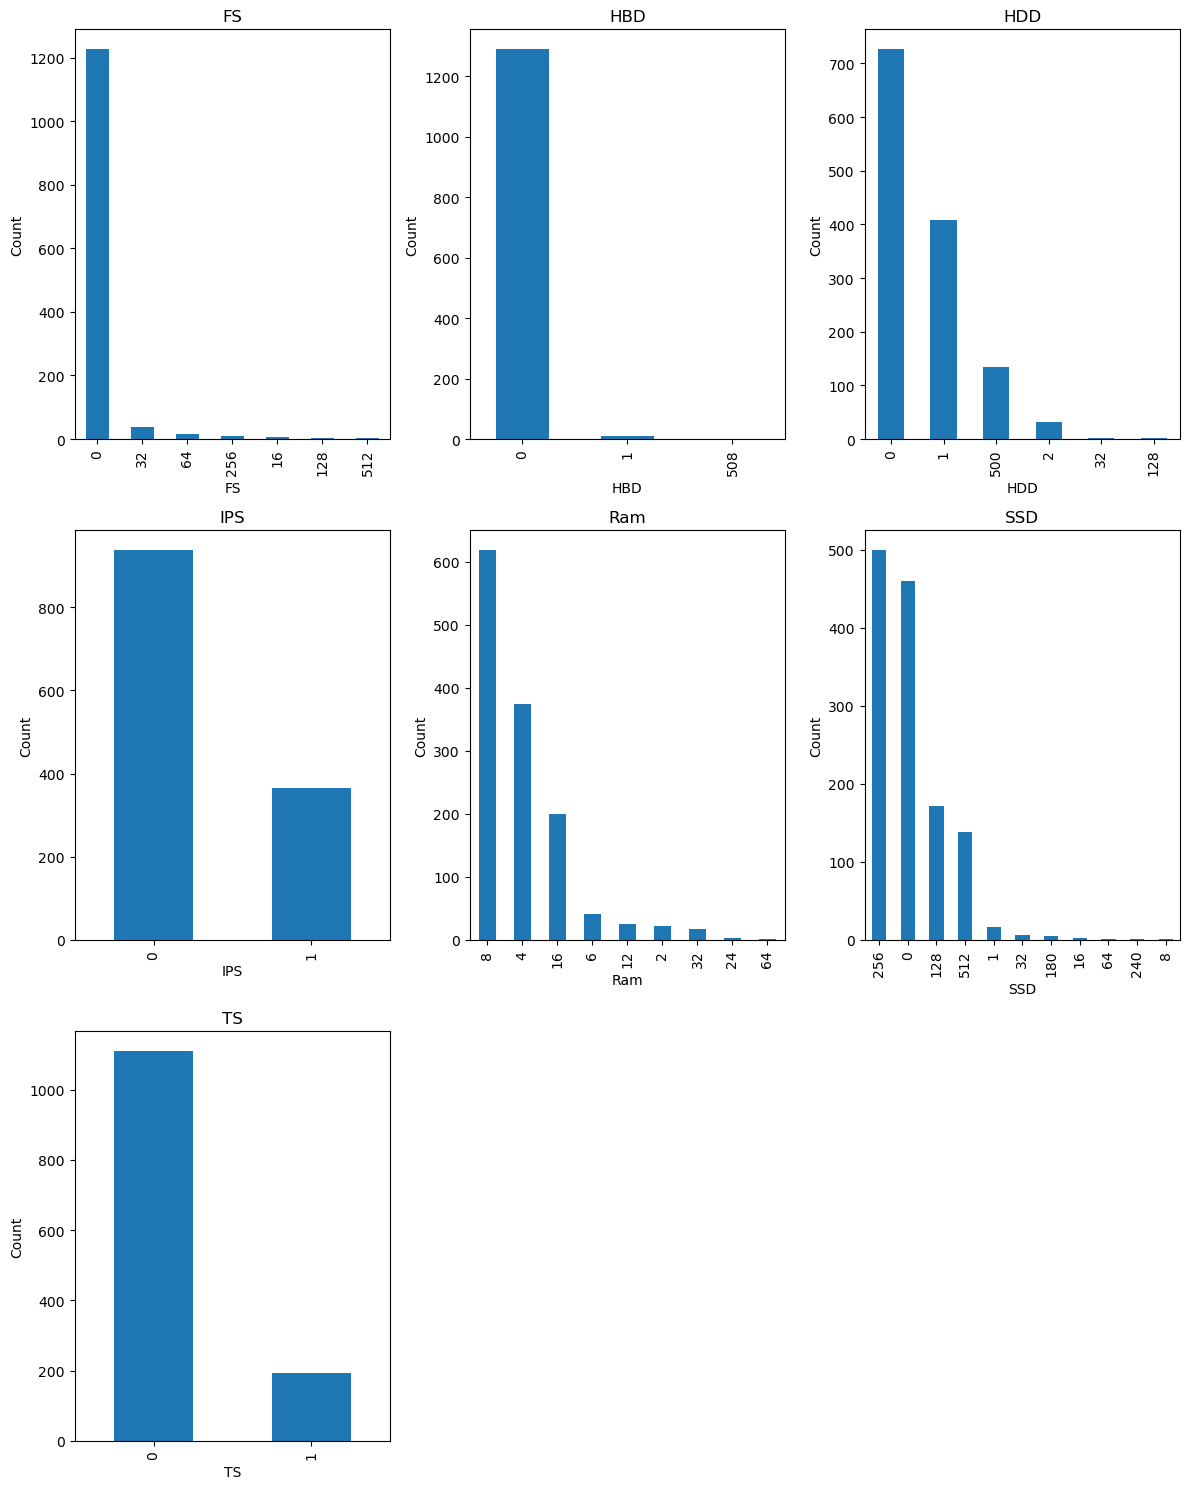

In [40]:
# Assuming num_var is your numerical variable DataFrame
plt.figure(figsize=(12, 15))

# Plotting value count bar plots for each numerical variable
for i, column in enumerate(num_var.columns):
    plt.subplot(3, 3,i+1)
    num_var[column].value_counts().plot(kind='bar')
    plt.title(f'{column}')
    plt.ylabel('Count')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


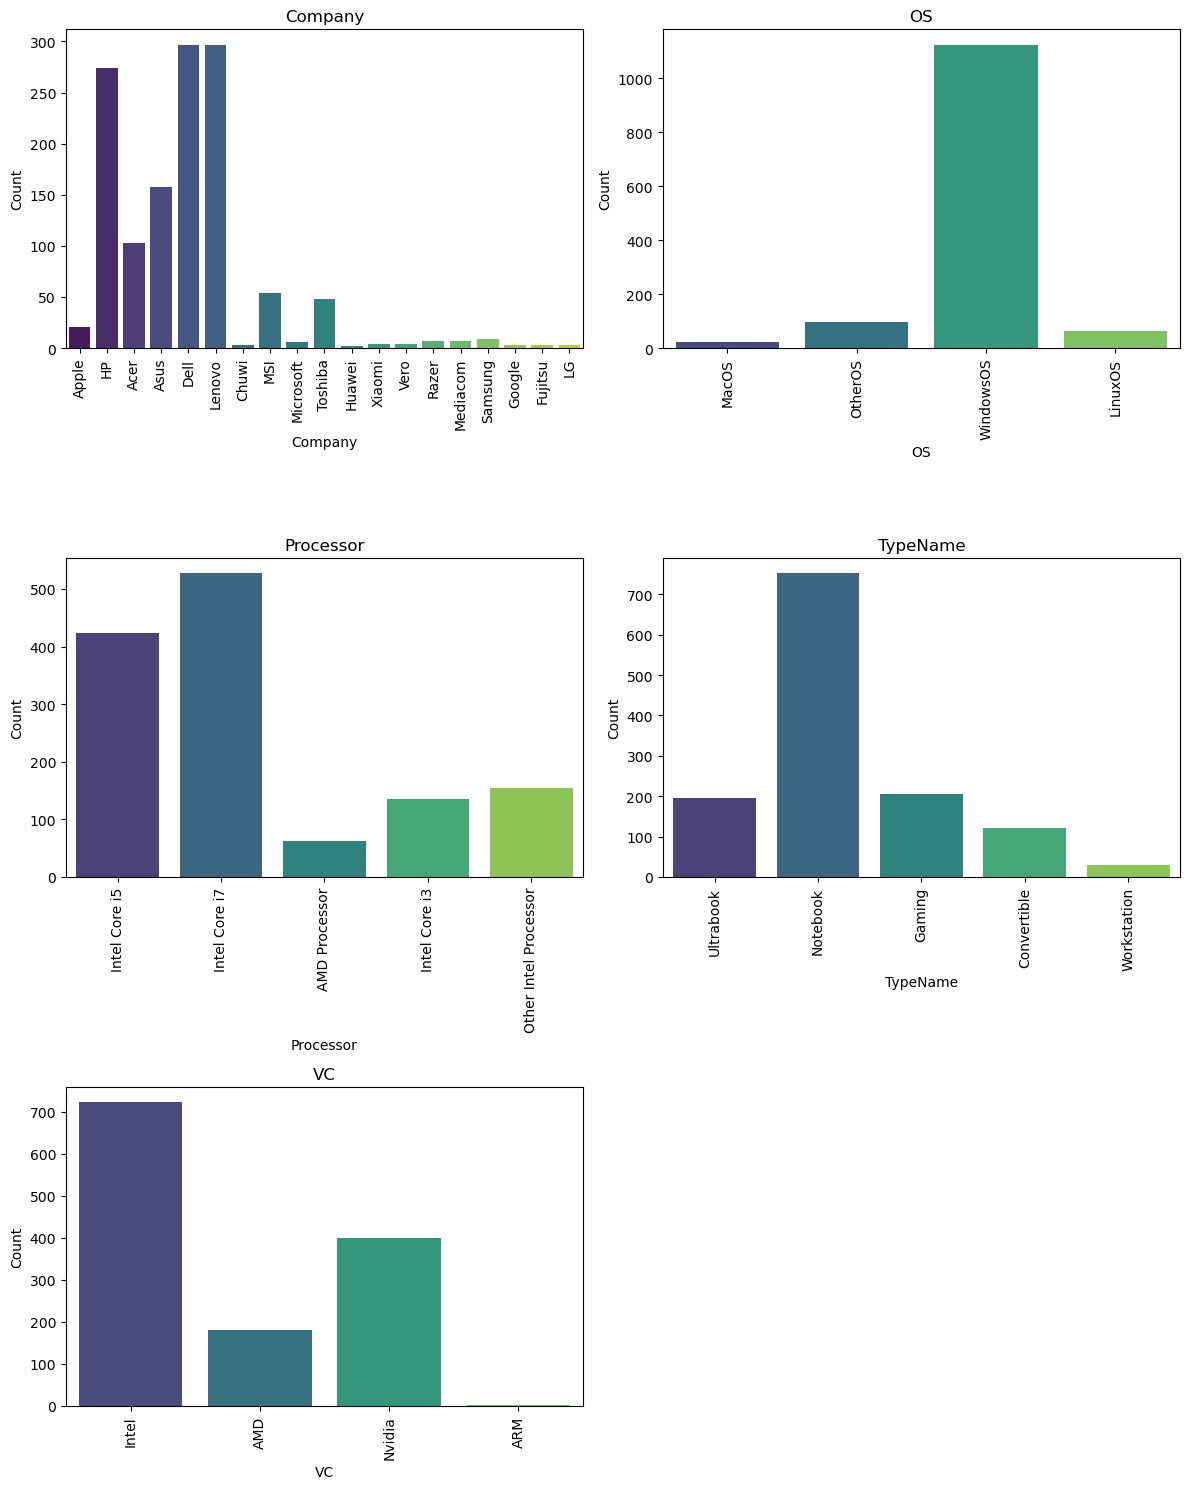

In [41]:
# Figure size
plt.figure(figsize=(12, 15))

# Plotting value count bar plots for each categorical variable
for i, column in enumerate(cat_var.columns):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=cat_var, x=column, palette='viridis')  # Use 'viridis' colormap
    plt.title(f'{column}')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##  Bivarite Analysis

### Numerical correlation matrix with Target column ('Price')

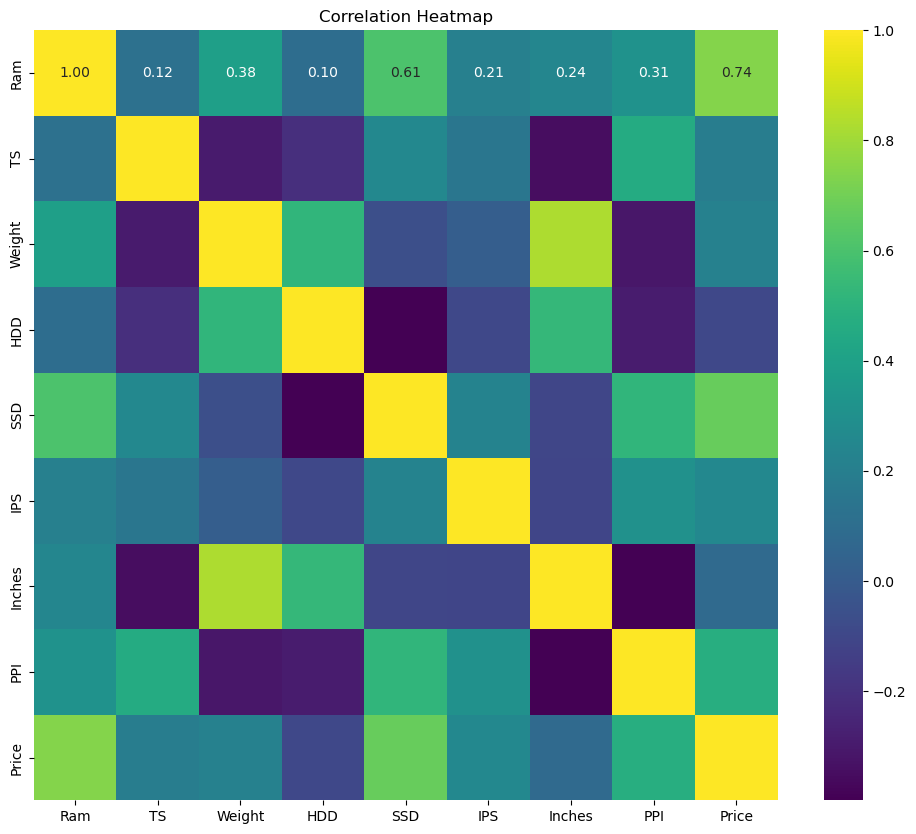

In [72]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Set the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(numeric_df.corr(), annot= True, cmap='viridis', fmt=".2f")

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [43]:
df=df.drop(columns=['FS','HBD'])
df

,Company,OS,Processor,TypeName,VC,Ram,TS,Weight,HDD,SSD,IPS,Inches,PPI,Price
0,Apple,MacOS,Intel Core i5,Ultrabook,Intel,8,0,1.37,0,128,1,13.3,227.0,71378.6832
1,Apple,MacOS,Intel Core i5,Ultrabook,Intel,8,0,1.34,0,0,0,13.3,128.0,47895.5232
2,HP,OtherOS,Intel Core i5,Notebook,Intel,8,0,1.86,0,256,0,15.6,141.0,30636.0000
3,Apple,MacOS,Intel Core i7,Ultrabook,AMD,16,0,1.83,0,512,1,15.6,218.0,135195.3360
4,Apple,MacOS,Intel Core i5,Ultrabook,Intel,8,0,1.37,0,256,1,13.3,227.0,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,WindowsOS,Intel Core i7,Convertible,Intel,4,1,1.80,0,128,1,14.0,157.0,33992.6400
1299,Lenovo,WindowsOS,Intel Core i7,Convertible,Intel,16,1,1.30,0,512,1,13.3,276.0,79866.7200
1300,Lenovo,WindowsOS,Other Intel Processor,Notebook,Intel,2,0,1.50,0,0,0,14.0,112.0,12201.1200
1301,HP,WindowsOS,Intel Core i7,Notebook,AMD,6,0,2.19,1,0,0,15.6,100.0,40705.9200


In [44]:
print(df['HDD'].value_counts())

HDD
0      727
1      409
500    134
2       31
32       1
128      1
Name: count, dtype: int64


In [45]:
# Replace values in the 'HDD' column
df['HDD'] = df['HDD'].replace({1: 1024, 2: 2048, 500:512})

# Verify the changes
print(df['HDD'].value_counts())


HDD
0       727
1024    409
512     134
2048     31
32        1
128       1
Name: count, dtype: int64


In [46]:
print(df['SSD'].value_counts())

SSD
256    500
0      460
128    172
512    138
1       16
32       6
180      5
16       3
64       1
240      1
8        1
Name: count, dtype: int64


In [47]:
# Replace values in the 'HDD' column
df['SSD'] = df['SSD'].replace({500: 512, 1: 1024, 2: 2048, 240: 256, 180: 128})

# Verify the changes
print(df['SSD'].value_counts())

SSD
256     501
0       460
128     177
512     138
1024     16
32        6
16        3
64        1
8         1
Name: count, dtype: int64


### Categorial Correlation with Price

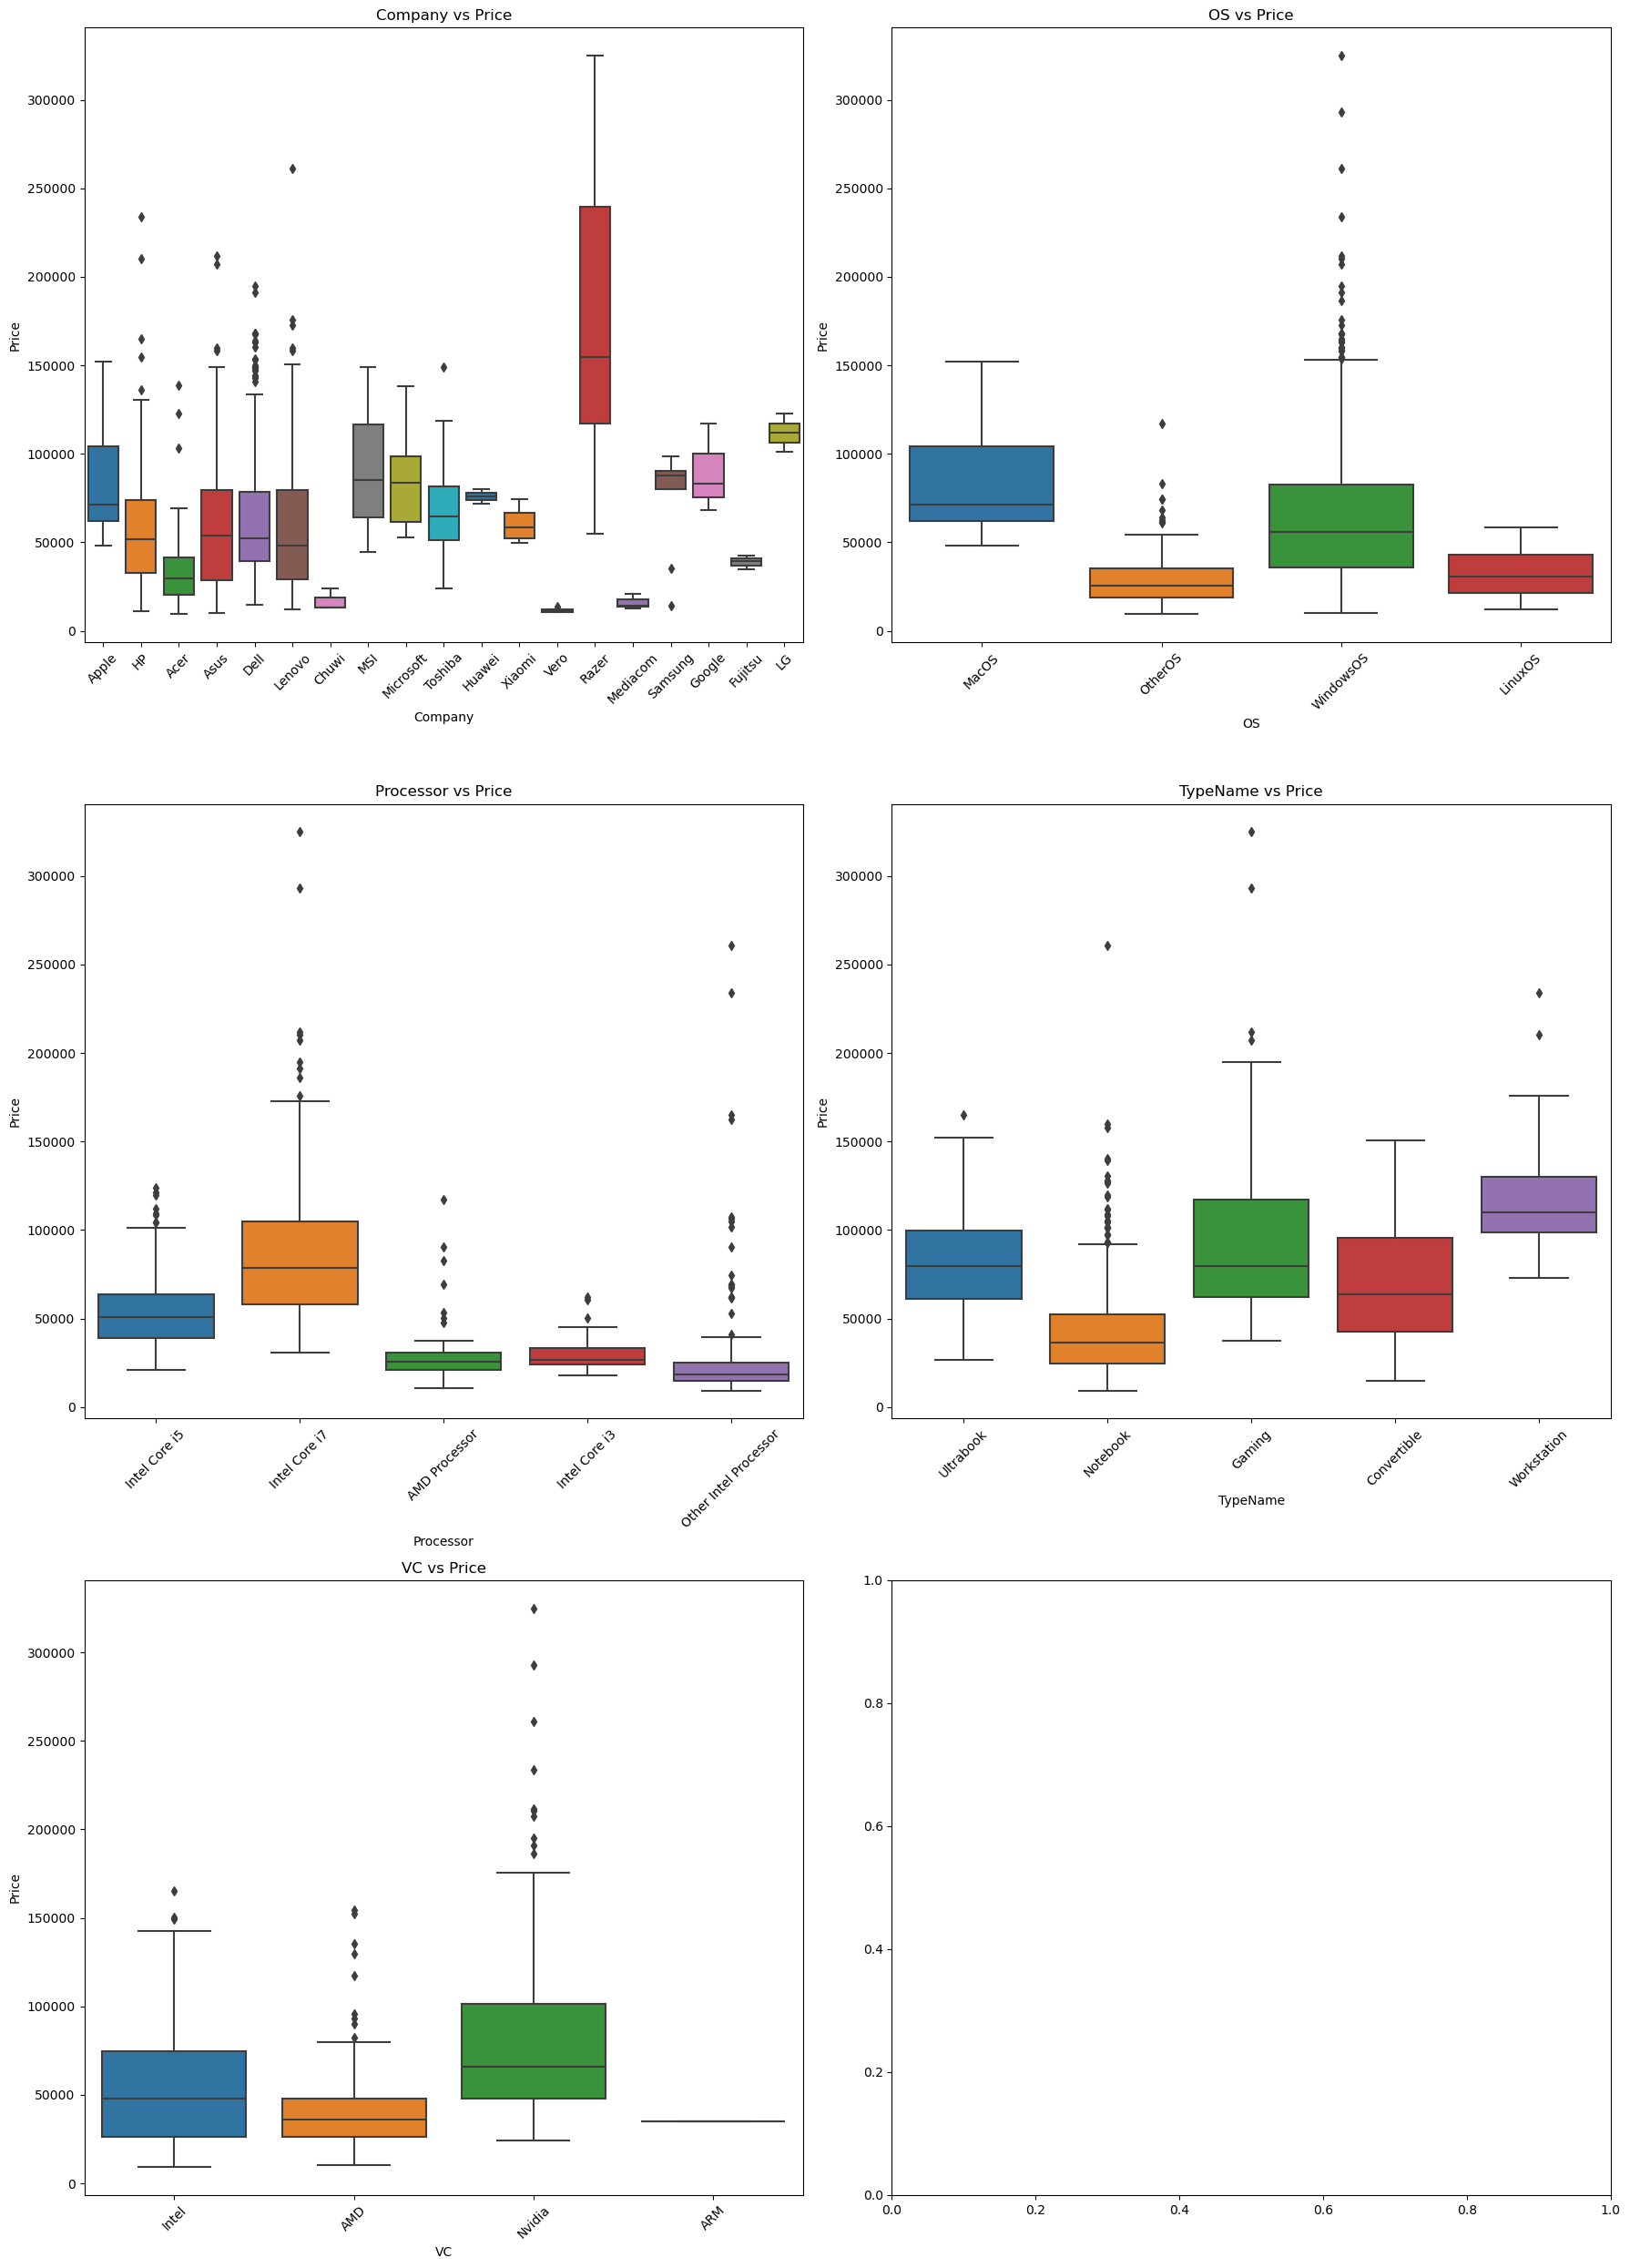

In [48]:
# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 25))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plotting boxplots for each categorical variable against Price
for i, column in enumerate(cat_var.columns):
    sns.boxplot(x=cat_var[column], y=df['Price'], ax=axes[i], palette='tab10')  # Set palette to 'viridis'
    axes[i].set_title(f'{column} vs Price')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Price')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Models Training 

In [49]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

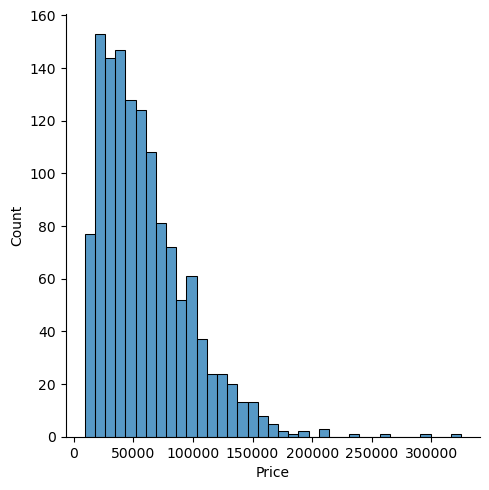

In [50]:
sns.displot(df['Price'])

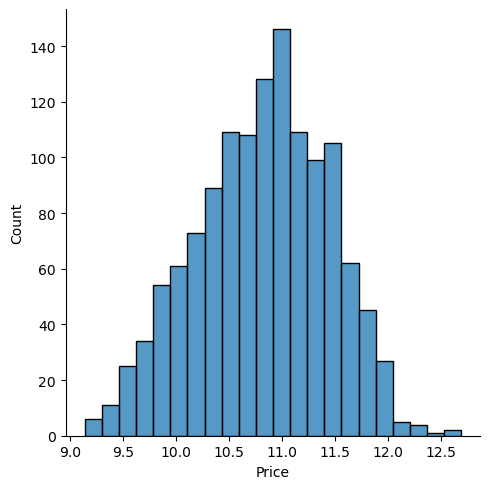

In [51]:
sns.displot(np.log(df['Price']))

In [52]:
 # Drop the target variable column
X = df.drop('Price', axis=1) 
y = np.log(df['Price'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
preprocessor = ColumnTransformer(transformers=[
    ('OneHot', OneHotEncoder(sparse= False, drop='first'), [0,1,2,3,4])
],remainder='passthrough')

In [54]:
# Create pipeline with preprocessing steps and models

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor())
])
pipeline_Gb = Pipeline([
    ('preprocessor', preprocessor),
    ('Gb', GradientBoostingRegressor())
])

pipeline_Xgr = Pipeline([
    ('preprocessor', preprocessor),
    ('Xgr', XGBRegressor())
])

# List of pipelines for easy iteration
pipelines = [pipeline_rf, pipeline_Gb,  pipeline_Xgr]

# Dictionary of pipelines and model types for easy reference
pipe_dict = {0: 'Random Forest', 1: 'Gradient Boosting', 2: 'XGRegressor'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

## Models Evaulations

In [55]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [56]:
# Fit the pipelines and evaluate them
for i, pipe in enumerate(pipelines):
    
    # Generate predictions on the test data
    y_pred = pipe.predict(X_test)
    
    # Calculate the R2 score for the current model
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Print the R2 score for the current model
    print(f"{pipe_dict[i]} R2 Score:", r2)
    print(f"{pipe_dict[i]} Mean Squared Error:", mse,'\n')

Random Forest R2 Score: 0.8727742916308379
Random Forest Mean Squared Error: 0.04509177468200148 

Gradient Boosting R2 Score: 0.86527740679291
Gradient Boosting Mean Squared Error: 0.047748846481891684 

XGRegressor R2 Score: 0.8872680008456847
XGRegressor Mean Squared Error: 0.039954864236779436 



###  Model's HyperparametersTuning

In [57]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model
param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10]
}

param_grid_Gb = {
    'Gb__n_estimators': [50, 100, 200],
    'Gb__learning_rate': [0.05, 0.1, 0.2],
    'Gb__max_depth': [3, 5, 7]
}

param_grid_Xgr = {
    'Xgr__n_estimators': [50, 100, 200],
    'Xgr__learning_rate': [0.05, 0.1, 0.2],
    'Xgr__max_depth': [3, 5, 7]
}

# Define GridSearchCV objects for each pipeline
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='r2')
grid_search_Gb = GridSearchCV(pipeline_Gb, param_grid_Gb, cv=5, scoring='r2')
grid_search_Xgr = GridSearchCV(pipeline_Xgr, param_grid_Xgr, cv=5, scoring='r2')

# List of grid search objects for easy iteration
grid_searches = [grid_search_rf, grid_search_Gb, grid_search_Xgr]

# Fit the grid search objects
for grid_search in grid_searches:
    grid_search.fit(X_train, y_train)

# Evaluate the best models from grid search
for i, grid_search in enumerate(grid_searches):
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"Best {pipe_dict[i]} R2 Score:", r2)

Best Random Forest R2 Score: 0.8718803248021199
Best Gradient Boosting R2 Score: 0.8151276758414744
Best XGRegressor R2 Score: 0.8118374193234873


# Deciding Final Model: Random Forest Regressor

In [58]:
# Create a pipeline with preprocessing steps and Random Forest Regressor as the final model
pipe = Pipeline([
    ('preprocessor', preprocessor),  # Preprocess the data using the defined preprocessor
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))  # Random Forest Regressor with 100 estimators and a fixed random state
])

# Fit the final pipeline to the training data
pipe.fit(X_train, y_train)

# The final_pipeline is now trained and ready for making predictions

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 2, 3, 4])])),
                ('rf', RandomForestRegressor(random_state=42))])

In [59]:
# Generate predictions on the test data
y_pred = pipe.predict(X_test)

In [60]:
# Apply inverse transformation to predictions
y_pred_original_scale = np.exp(y_pred)

print(y_pred_original_scale)

[ 70015.40522414  71025.15923186  24955.5192039   49644.40627556
  78971.75767088  77858.29845695  40355.94175089  25988.04187247
  71425.38282189  24713.28976684 110335.52541412  41027.09431494
  92066.82235717  40107.38418652  96419.13520259  56878.12844168
  73521.04946989  51662.70629168  36778.82847583 104970.52231177
 140686.05179571  38174.26600328  53045.06556026  14925.94836774
  56938.78557682  62090.57335156  35036.81252372  32218.96885738
  85813.88288475  54484.36685309  24319.35726525  83283.14688017
  88586.70458535  53134.41922466  65347.34050373  39012.70601243
  36763.05580777  23716.34472337  61713.43720001  11444.75162162
  87594.0107155   32559.37331714  46076.06793883 144498.02535179
  27139.69231794  54484.36685309  89074.04544899  11536.3027268
  48094.85272895  82093.53460961  89891.74288553  27737.11986569
  40227.96982216  68335.26876118  31082.24728034  52498.2444823
  11536.3027268   55716.57639183  71387.05868878  49644.40627556
  87499.57413739  52477.843

In [61]:
# Compute performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 0.15723288972323676
Mean Squared Error (MSE): 0.044438117948296815
Root Mean Squared Error (RMSE): 0.21080350554081595
R-squared (R2) Score: 0.8746185734663239


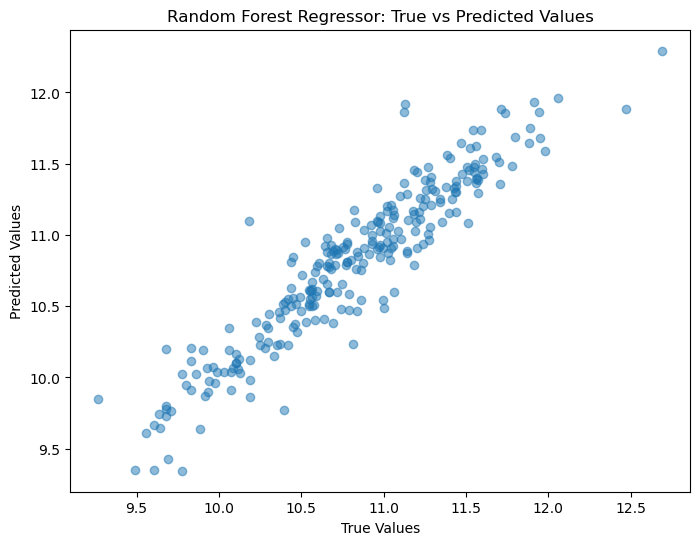

In [62]:
# Make predictions on the test set
y_pred = pipe.predict(X_test)

# Plot predicted vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor: True vs Predicted Values')
plt.show()


### Export Model and Data File

In [63]:
import pickle

# Save the final pipeline to a file using joblib
pickle.dump(pipe, open('pipe.pkl','wb'))

In [64]:
# Save the cleaned Data file for App
pickle.dump(df,open('df.pkl','wb'))

In [65]:
df.to_csv('cleaned_Data.csv', index=False)  # Set index=False to exclude the DataFrame index from the CSV